In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.3


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
from pickle import load
data= load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
 1.189e-01],
 [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
 8.902e-02],
 [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
 8.758e-02],
 ...,
 [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
 7.820e-02],
 [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
 1.240e-01],
 [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
 7.039e-02]])

In [8]:
data.data.shape #(n_of_samples,n_of_features)

(569, 30)

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='%lt;U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error',
 'fractal dimension error', 'worst radius', 'worst texture',
 'worst perimeter', 'worst area', 'worst smoothness',
 'worst compactness', 'worst concavity', 'worst concave points',
 'worst symmetry', 'worst fractal dimension'], dtype='%lt;U23')

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(data.data , data.target, test_size=0.33)

In [12]:
N, D = x_train.shape

In [13]:
N, D #(n_of_samples,n_of_features)

(381, 30)

In [14]:
from sklearn.preprocessing import StandardScaler # gives mean =0 and variant =1 for each point in the data

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #we are fitting only in the train data set 
x_test =scaler.transform(x_test)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
model

In [21]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
#train the model
r= model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 0.4497 - accuracy: 0.8136 - val_loss: 0.4559 - val_accuracy: 0.7606
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.8478 - val_loss: 0.4151 - val_accuracy: 0.8404
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3695 - accuracy: 0.8819 - val_loss: 0.3805 - val_accuracy: 0.8511
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3388 - accuracy: 0.9055 - val_loss: 0.3532 - val_accuracy: 0.8564
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.9029 - val_loss: 0.3309 - val_accuracy: 0.8883
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2945 - accuracy: 0.9081 - val_loss: 0.3125 - val_accuracy: 0.8830
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2778 - accuracy: 0.9108 - val_loss: 0.2970 - val_accuracy: 0.8883
Epoch 8/100


In [24]:
print('train score: ', model.evaluate(x_train,y_train))
print('test score: ', model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9843
train score:  [0.06912773102521896, 0.9842519760131836]
6/6 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9734
test score:  [0.11371418833732605, 0.9734042286872864]


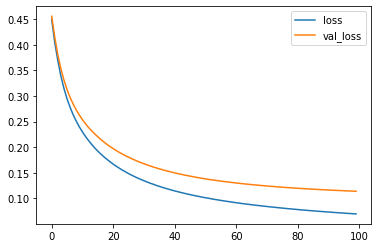

In [27]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

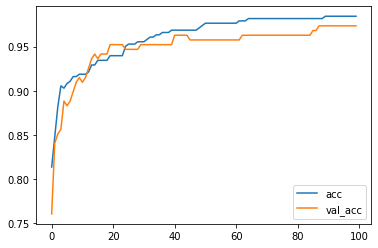

In [28]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();